# Singular Spectrum Analysis (SSA) или анализ сингулярного спектра (АСС)

Основная идея метода состоит в представлении временного ряда в виде последовательности векторов достаточно большой размерности с дальнейшим анализом линейной структуры их совокупности как реализации многомерной случайной величины c помощью метода главных компонент Такой анализ дает фактически разложение исходной функции, порождающей временной ряд, в аналог ряда Фурье по базису, порожденному самой функцией

Одним из неоспоримых достоинств выбранного метода следует отнести отсутствие требования априорного знания модели ряда, что практически не влияет на качество полученных результатов.
алгоритм сингулярного спектрального анализа, для наибольшей наглядности он разбит на несколько шагов: вложение, сингулярное разложение, группировка и диагональное усреднение (восстановление) Вложение и сингулярное разложение в совокупности называются разложением. Группировка и диагональное усреднение – восстановлением
Основным параметром данного алгоритма служит, так называемая, длина окна L причем 1<L<N

# Разложение

Развертка одномерного ряда в многомерный
Выбираем некоторое число M < N, называемое длиной окна. Поскольку, основным моментом данного шага является вложение, состоящее в формировании так называемой траекторной матрицы A. Размер данной матрицы – M  ×  k , где k = N - M + 1 (N – длина самого ряда), таким образом, для построения последовательно возьмем отрезки Длины L, а точнее: первые L значения последовательности и используем в качестве первой строки матрицы X, а в качестве второй строки – значения последовательности с  𝑥2  по  𝑥𝑀−+1 . При построении последней строки матрицы воспользуемся последними (оставшимися) L элементами последовательности:

Анализ главных компонент: сингулярное разложение выборочной корреляционной матрицы

# Восстановление

Из ортогональности матрицы  𝑃  следует, что при умножении матрицы главных компонент  𝑌  на  𝑃𝑇  восстанавливается матрица  𝑋∗  , при этом получается разложение нормированной и центрированной матрицы  𝑋∗  в сумму матриц  𝑋∗𝑖  , каждая из которых порождена одним собственным вектором матрицы  𝑅 .

Переход к исходному ряду формально может быть осуществлен усреднением по побочным диагоналям. Обозначим через A этот оператор усреднения
𝑥=𝐴(𝑋) 

https://colab.research.google.com/drive/1Tlp4F-iM0PBTDsmDKQTtF2p954ueTrzB#scrollTo=mIZ-YqjXDJsS

Загрузим библиотеки

In [2]:
# Load the usual suspects:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.grid'] = True
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

# A simple little 2D matrix plotter, excluding x and y labels.
def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [3]:
r1 = pd.read_csv('daily-total-female-births-in-cal.csv')

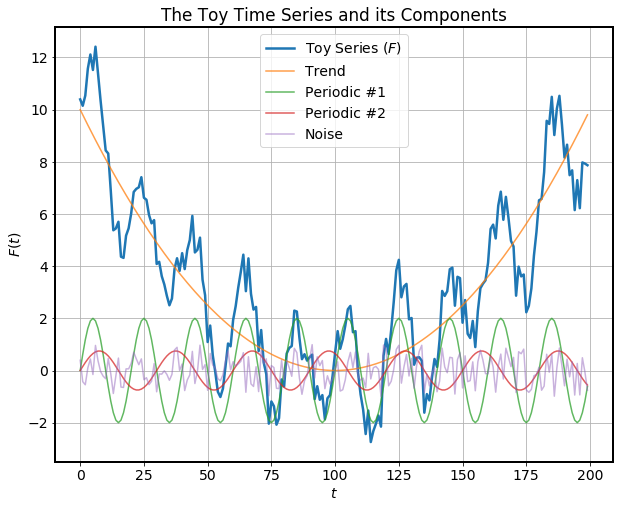

In [4]:
N = 200 # The number of time 'moments' in our toy series
t = np.arange(0,N)
trend = 0.001 * (t - 100)**2
p1, p2 = 20, 30
periodic1 = 2 * np.sin(2*pi*t/p1)
periodic2 = 0.75 * np.sin(2*pi*t/p2)

np.random.seed(123) # So we generate the same noisy time series every time.
noise = 2 * (np.random.rand(N) - 0.5)
F = trend + periodic1 + periodic2 + noise

# Plot everything
plt.plot(t, F, lw=2.5)
plt.plot(t, trend, alpha=0.75)
plt.plot(t, periodic1, alpha=0.75)
plt.plot(t, periodic2, alpha=0.75)
plt.plot(t, noise, alpha=0.5)
plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$")
plt.title("The Toy Time Series and its Components");

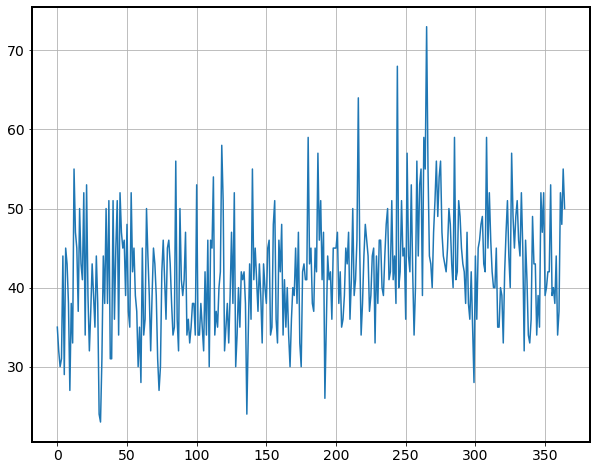

In [5]:
plt.plot(range(r1.shape[0]),r1.Count.tolist())

Создаем траекторную матрицу

In [6]:
N = 200
L = 100 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([F[i:i+L] for i in range(0,K)])
# Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive. 

In [7]:
N2 = 365
L2 = 180 # The window length.
K2 = N2 - L2 + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X2 = np.column_stack([r1[i:i+L2]['Count'] for i in range(0,K2)])

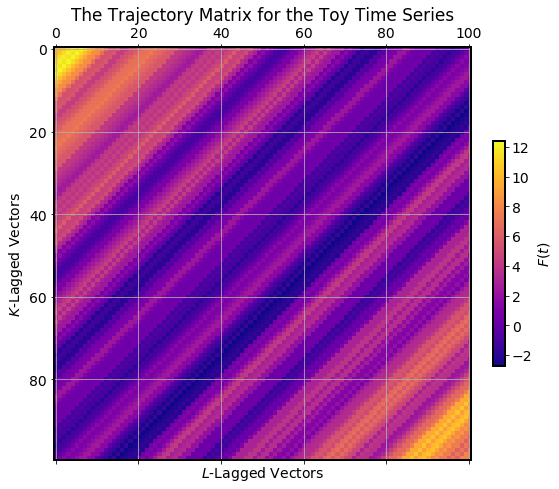

In [8]:
ax = plt.matshow(X)
plt.xlabel("$L$-Lagged Vectors")
plt.ylabel("$K$-Lagged Vectors")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("$F(t)$")
plt.title("The Trajectory Matrix for the Toy Time Series");

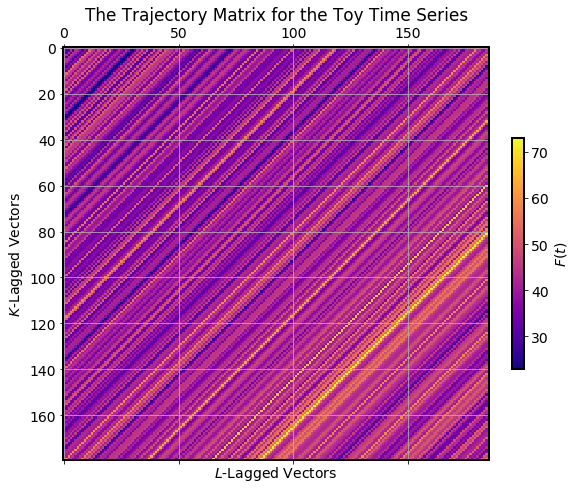

In [9]:
ax = plt.matshow(X2)
plt.xlabel("$L$-Lagged Vectors")
plt.ylabel("$K$-Lagged Vectors")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("$F(t)$")
plt.title("The Trajectory Matrix for the Toy Time Series");

In [10]:
d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.


U, Sigma, V = np.linalg.svd(X)
V = V.T # Note: the SVD routine returns V^T

X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

# Quick sanity check: the sum of all elementary matrices in X_elm should be equal to X, to within a 
# *very small* tolerance:
if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")

In [11]:
d2 = np.linalg.matrix_rank(X2) # The intrinsic dimensionality of the trajectory space.


U, Sigma, V = np.linalg.svd(X2)
V = V.T # Note: the SVD routine returns V^T

X2_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d2)] )

# Quick sanity check: the sum of all elementary matrices in X_elm should be equal to X, to within a 
# *very small* tolerance:
if not np.allclose(X2, X2_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")


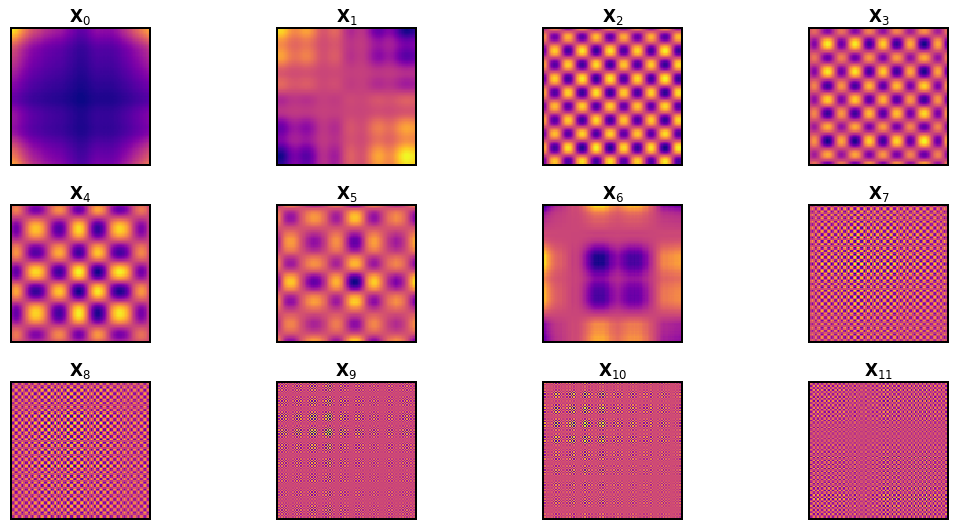

In [12]:
plt.figure(figsize=(15,10))
n = min(12, d) # In case d is less than 12 for the toy series. Say, if we were to exclude the noise component...
for i in range(n):
    plt.subplot(4,4,i+1)
    title = "$\mathbf{X}_{" + str(i) + "}$"
    plot_2d(X_elem[i], title)
plt.tight_layout()

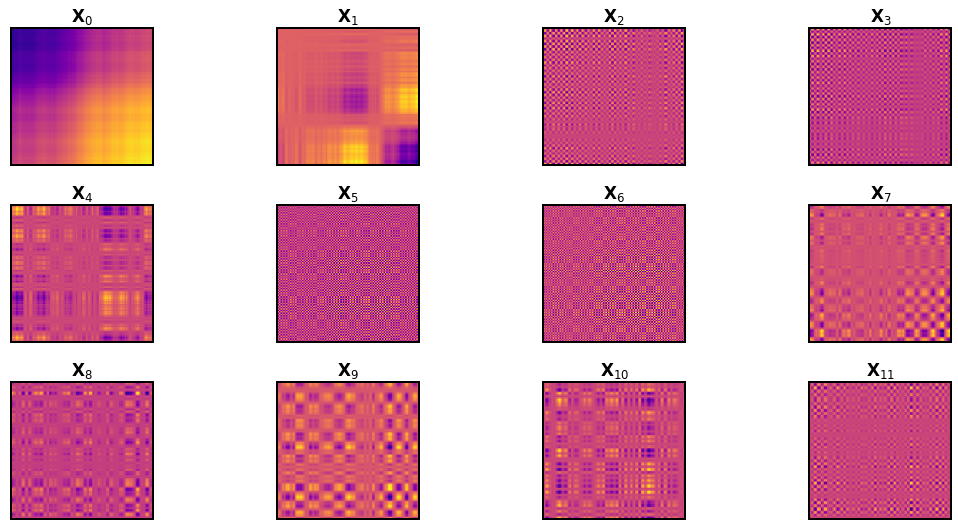

In [13]:
plt.figure(figsize=(15,10))
n = min(12, d2) # In case d is less than 12 for the toy series. Say, if we were to exclude the noise component...
for i in range(n):
    plt.subplot(4,4,i+1)
    title = "$\mathbf{X}_{" + str(i) + "}$"
    plot_2d(X2_elem[i], title)
plt.tight_layout()

In [14]:
def Hankelise(X):
    """
    Hankelises the matrix X, returning H(X).
    """
    L, K = X.shape
    transpose = False
    if L > K:
        # The Hankelisation below only works for matrices where L < K.
        # To Hankelise a L > K matrix, first swap L and K and tranpose X.
        # Set flag for HX to be transposed before returning. 
        X = X.T
        L, K = K, L
        transpose = True

    HX = np.zeros((L,K))
    
    # I know this isn't very efficient...
    for m in range(L):
        for n in range(K):
            s = m+n
            if 0 <= s <= L-1:
                for l in range(0,s+1):
                    HX[m,n] += 1/(s+1)*X[l, s-l]    
            elif L <= s <= K-1:
                for l in range(0,L-1):
                    HX[m,n] += 1/(L-1)*X[l, s-l]
            elif K <= s <= K+L-2:
                for l in range(s-K+1,L):
                    HX[m,n] += 1/(K+L-s-1)*X[l, s-l]
    if transpose:
        return HX.T
    else:
        return HX

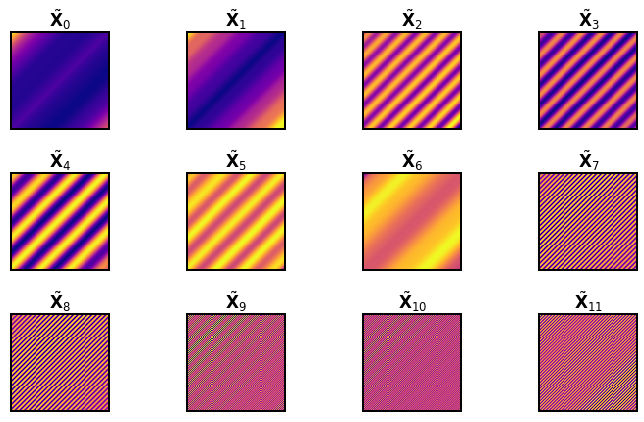

In [15]:
n = min(d, 12)
for j in range(0,n):
    plt.subplot(4,4,j+1)
    title = r"$\tilde{\mathbf{X}}_{" + str(j) + "}$"
    plot_2d(Hankelise(X_elem[j]), title)
plt.tight_layout() 


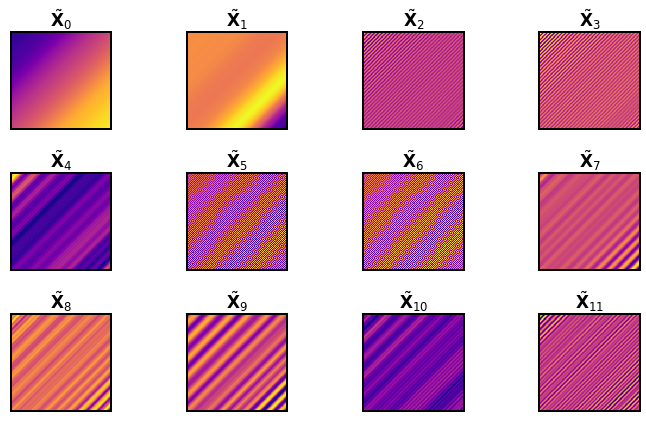

In [16]:
n = min(d, 12)
for j in range(0,n):
    plt.subplot(4,4,j+1)
    title = r"$\tilde{\mathbf{X}}_{" + str(j) + "}$"
    plot_2d(Hankelise(X2_elem[j]), title)
plt.tight_layout() 

In [17]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

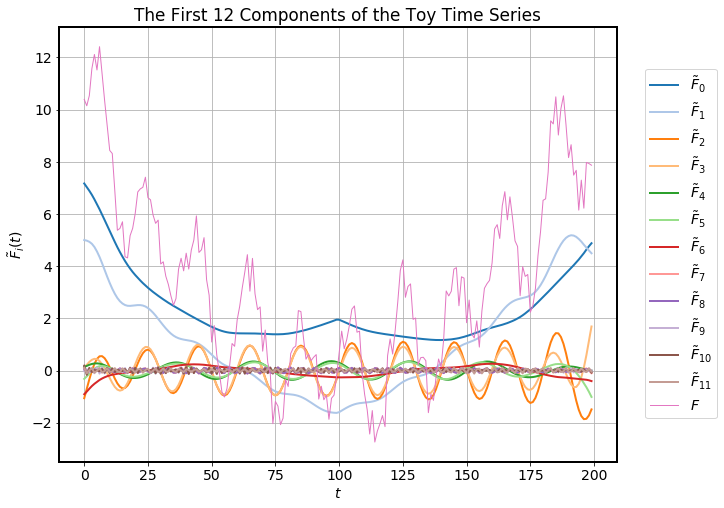

In [18]:


n = min(12,d) # In case of noiseless time series with d < 12.

# Fiddle with colour cycle - need more colours!
fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
for i in range(n):
    F_i = X_to_TS(X_elem[i])
    fig.axes.plot(range(F_i.shape[0]), F_i, lw=2)

fig.axes.plot(range(F.shape[0]), F, alpha=1, lw=1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("The First 12 Components of the Toy Time Series")
fig.legend(legend, loc=(1.05,0.1));

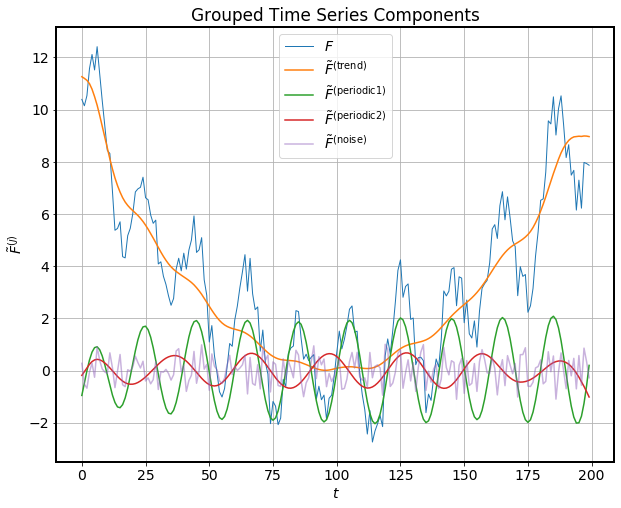

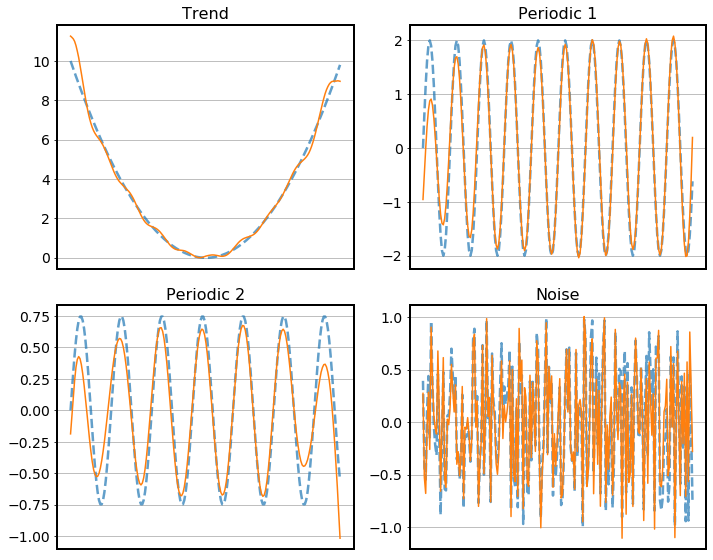

In [19]:
# Assemble the grouped components of the time series.
F_trend = X_to_TS(X_elem[[0,1,6]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[2,3]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[4,5]].sum(axis=0))
F_noise = X_to_TS(X_elem[7:].sum(axis=0))

# Plot the toy time series and its separated components on a single plot.
plt.plot(t,F, lw=1)
plt.plot(t, F_trend)
plt.plot(t, F_periodic1)
plt.plot(t, F_periodic2)
plt.plot(t, F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "periodic 2", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.show()

# A list of tuples so we can create the next plot with a loop.
components = [("Trend", trend, F_trend), 
              ("Periodic 1", periodic1, F_periodic1),
              ("Periodic 2", periodic2, F_periodic2),
              ("Noise", noise, F_noise)]

# Plot the separated components and original components together.
fig = plt.figure()
n=1
for name, orig_comp, ssa_comp in components:
    ax = fig.add_subplot(2,2,n)
    ax.plot(t, orig_comp, linestyle="--", lw=2.5, alpha=0.7)
    ax.plot(t, ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()


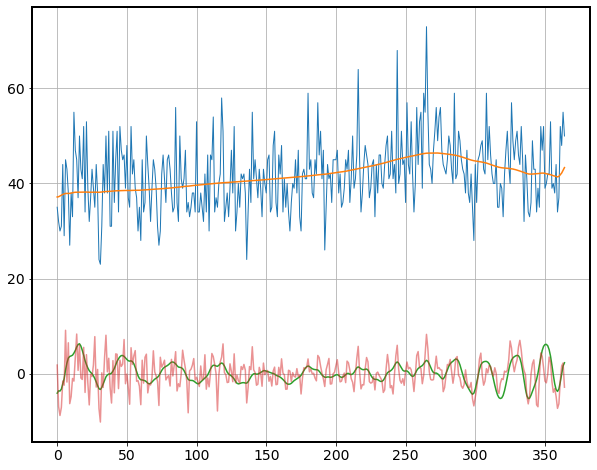

In [20]:
F2_trend = X_to_TS(X2_elem[[0,1]].sum(axis=0))
F2_periodic1 = X_to_TS(X2_elem[[4,8,9,10,7]].sum(axis=0))
#F_periodic2 = X_to_TS(X2_elem[].sum(axis=0))
F2_noise = X_to_TS(X2_elem[[2,3,6,7,11,12,13,14,15,16,17,18,19,20]].sum(axis=0))

plt.plot(range(r1.shape[0]),r1.Count, lw=1)
plt.plot(range(F2_trend.shape[0]), F2_trend)
plt.plot(range(F2_periodic1.shape[0]), F2_periodic1)
plt.plot(range(F2_noise.shape[0]), F2_noise, alpha=0.5)

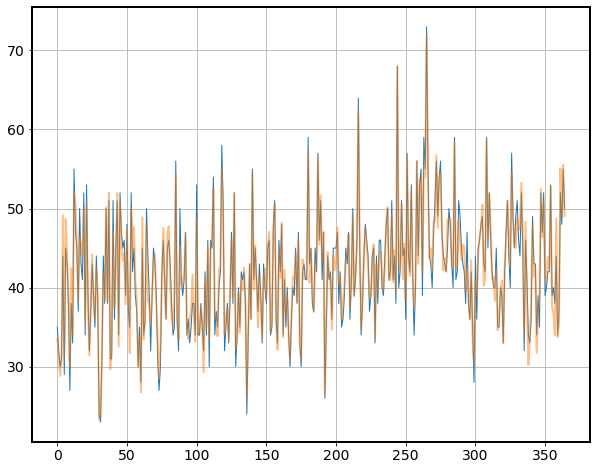

In [21]:
F_fin = X_to_TS(X2_elem[:100].sum(axis=0))
plt.plot(range(r1.shape[0]),r1.Count, lw=1)
plt.plot(range(F_fin.shape[0]),F_fin, lw=2, alpha=0.5)


# Вторая часть
https://colab.research.google.com/drive/1_DMrRiHoK4GwMiyYuI6jWw07tHyPG50m#scrollTo=nloIUk-8WVk5

# Singular Spectrum Analysis for Time Series in Python

По материалам:  
https://www.gistatgroup.com/gus/ssa_an.pdf  
https://naukovedenie.ru/PDF/41TVN315.pdf  
https://www.kaggle.com/jdarcy/introducing-ssa-for-time-series-decomposition  
https://github.com/aj-cloete/pssa  

In [1]:
from mySSA import mySSA

import pandas as pd
import numpy as np

In [2]:
ts = pd.read_csv('monthly-sales-of-company-x-jan-6.csv', parse_dates=True, index_col='Month')

In [3]:
ts

,Count
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36
...,...
1971-01-01,628
1971-02-01,308
1971-03-01,324


Создаем объект для проведения SSA анализа использую полученый ряд

In [4]:
ssa = mySSA(ts)

Основные методы объекта:

In [5]:
[x for x in dir(ssa) if '__' not in x and x[0]!='_']

['decompose',
 'diagonal_averaging',
 'embed',
 'forecast_recurrent',
 'freq',
 'get_contributions',
 'ts',
 'ts_N',
 'ts_name',
 'ts_v',
 'view_reconstruction',
 'view_s_contributions',
 'view_time_series']

Общая процедура SSA следующая:
1. **Создаем траекторную матрицу** из ряда векторов лагового окна (длина K).
2. **Декомпозируем полученую матрицу** с помощью разложения по сингулярным значениям
3. **Провести Eigentripple Grouping** - процесс идентификации пар собственное значение-собственный вектор как тренд, сезонность и шум.
4. **Восстановить временной ряд** из пар собственное значение-собственный вектор, определенных как трендовый и сезонный. Это делается посредством процесса, называемого диагональным усреднением.

In [6]:
K = 40
suspected_seasonality = 12

In [7]:
ssa.embed(embedding_dimension=40, suspected_frequency=suspected_seasonality, verbose=True)

----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  36
Trajectory dimensions	: (36, 42)
Complete dimension	: (36, 42)
Missing dimension     	: (36, 0)


In [8]:
ssa.decompose(verbose=True)

----------------------------------------
DECOMPOSITION SUMMARY:
Rank of trajectory		: 36
Dimension of projection space	: 28
Characteristic of projection	: 0.9998


Вклад каждого из сигналов (соответствующий каждому сингулярному значению) можно посмотреть следующим образом:

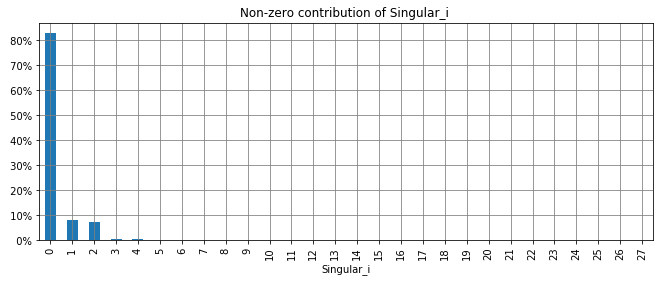

In [9]:
# First enable display of graphs in the notebook
%matplotlib inline 
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 11, 4
rcParams.update({"axes.grid" : True, "grid.color": "gray"})
ssa.view_s_contributions()

Из картинки видно, что большая часть вариации ряда содержится в первом сигнале (соответствующем первому сингулярному вектору). Масштаб на изображении выше затрудняет понимание того, что происходит с оставшимися сингулярными значениями.

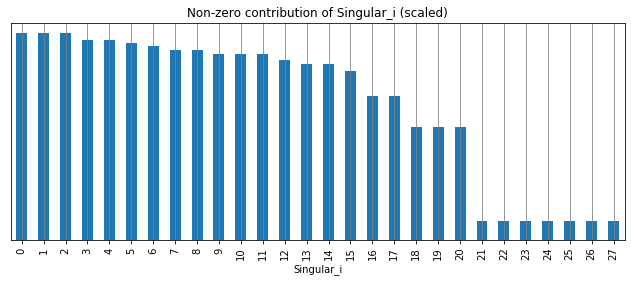

In [10]:
ssa.view_s_contributions(adjust_scale=True)

Переберем этот диапазон и посмотреть на первые 5 элементов.  
Аддитивные элементы сигнала хранятся в словаре object.Xs.

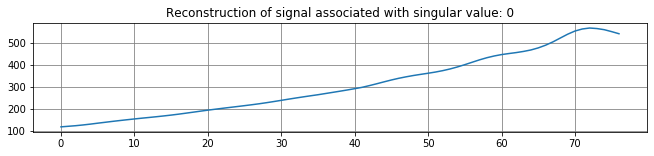

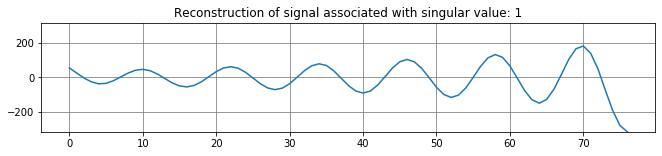

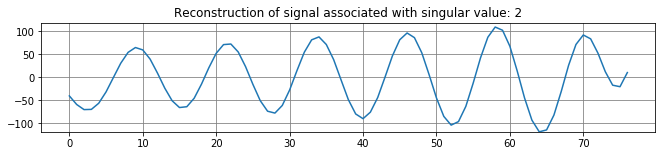

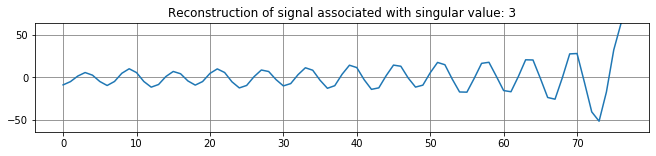

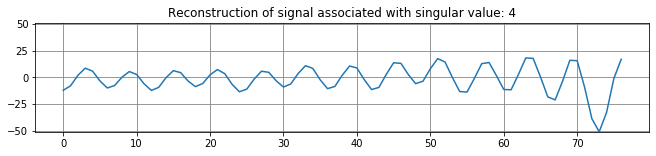

In [11]:
rcParams['figure.figsize'] = 11, 2
for i in range(5):
    ssa.view_reconstruction(ssa.Xs[i], names=i, symmetric_plots=i!=0)
rcParams['figure.figsize'] = 11, 4

Посмотрим на результат реконструкции сигнала из этих 5 составляющих.  Складываем первые 5 сигналов и передаем object.view_reconstruction:

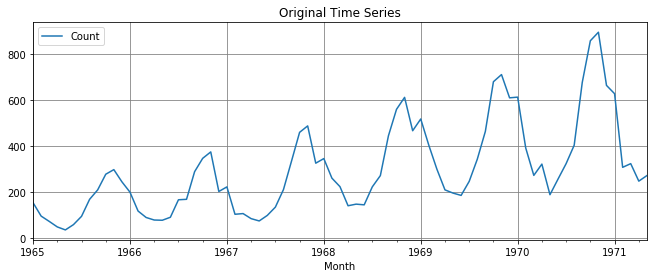

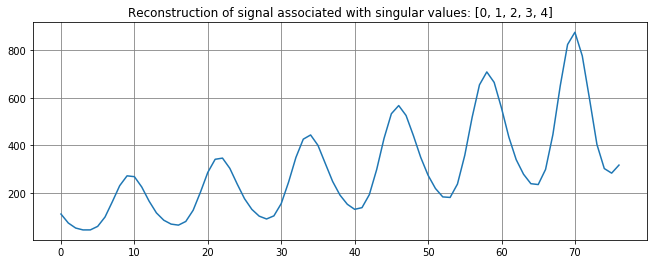

In [12]:
ssa.ts.plot(title='Original Time Series'); # This is the original series for comparison
streams5 = [i for i in range(5)]
reconstructed5 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, return_df=True)

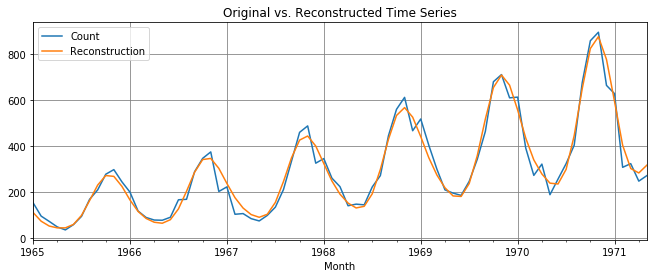

In [13]:
ts_copy5 = ssa.ts.copy()
ts_copy5['Reconstruction'] = reconstructed5.Reconstruction.values
ts_copy5.plot(title='Original vs. Reconstructed Time Series');

Мы можем приблизиться к исходному ряду сильней, добавив дополнительные сигналы от оставшихся сингулярных значений. Используем первые 10 сингулярных значений

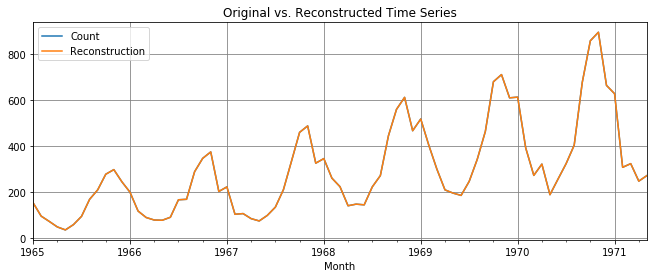

In [14]:
streams10 = [i for i in range(36)]
reconstructed10 = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams10], 
                                          names=streams10, return_df=True, plot=False)
ts_copy10 = ssa.ts.copy()
ts_copy10['Reconstruction'] = reconstructed10.Reconstruction.values
ts_copy10.plot(title='Original vs. Reconstructed Time Series');

Для прогноза, используется метод forecast_recurrent Передаем в него часть сингулярных значений.

In [17]:
# ssa.forecast_recurrent(steps_ahead=10, singular_values=streams10, plot=True)
ssa.forecast_recurrent(steps_ahead=48, singular_values=streams10, plot=True)

AttributeError: 'mySSA' object has no attribute 'R'

Прогноз на более длинный промежуток

In [18]:
rcParams['figure.figsize'] = 11,8
ssa.forecast_recurrent(steps_ahead=ssa.ts.shape[0], singular_values=streams10, plot=True)
rcParams['figure.figsize'] = 11, 4

AttributeError: 'mySSA' object has no attribute 'R'